# Notebook Title

Graded Challenge 1 <br>
Nama : Risqi Wahyu Permana <br>
Batch : HCK 006

## Description

### Objective

1. Melihat perbandingan jumlah kasus Covid-19 terkonfirmasi tiap prefektur di Jepang
2. Melihat perbandingan angka kesembuhan setiap tahun pada negara Jepang 

3. Melihat perbandingan angka kematian setiap tahun pada negara Jepang 
4. Melihat perbandingan angka kesembuhan dan kematian pada negara Jepang
5. Melihat perbandingan angka kesembuhan setiap tahun pada prefektur Tokyo
6. Melihat perbandingan angka kematian setiap tahun pada prefektur Tokyo 
7. Melihat perbandingan angka aktif, kesembuhan dan kematian pada prefektur Tokyo 
8. Melihat perbandingan angka kesembuhan setiap tahun antara prefektur Kyoto dan Fukuoka
9. Melihat perbandingan angka kematian setiap tahun antara prefektur Kyoto dan Fukuoka
10. Melihat perbandingan angka aktif, kesembuhan dan kematian antara prefektur Kyoto dan Fukuoka

# Working Area

### Query yang dipakai di Google Cloud Platform
```sql
SELECT province_state, country_region, date, confirmed, recovered, deaths
FROM bigquery-public-data.covid19_jhu_csse_eu.summary
Where country_region = 'Japan'
```

## Import pustaka yang dibutuhkan

In [1]:
import pandas as pd

## Data Loading

In [2]:
japan_df = pd.read_csv('h8dsft_P0GC1_Risqi_Wahyu_Permana.csv')
japan_df.head()

,province_state,country_region,date,confirmed,recovered,deaths
0,NaN,Japan,2020-05-15,16203,10338.0,713.0
1,Aichi,Japan,2022-05-26,535610,NaN,2059.0
2,Akita,Japan,2022-05-26,29950,NaN,66.0
3,Aomori,Japan,2022-05-26,56834,NaN,104.0
4,Chiba,Japan,2022-05-26,446447,NaN,1774.0


In [3]:
japan_df.tail()

,province_state,country_region,date,confirmed,recovered,deaths
49855,Unknown,Japan,2022-09-29,8,NaN,0.0
49856,Wakayama,Japan,2022-09-29,132327,NaN,249.0
49857,Yamagata,Japan,2022-09-29,104587,NaN,194.0
49858,Yamaguchi,Japan,2022-09-29,162288,NaN,385.0
49859,Yamanashi,Japan,2022-09-29,95387,NaN,153.0


Merubah nama kolom province_state menjadi prefektur karena sebutan <br>
daerah di Jepang yang terbagi - bagi ke cakupan wilayah kecil disebut prefektur

In [4]:
#change column name province_state to prefecture
japan_df = japan_df.rename(columns={'province_state':'prefecture'})
japan_df.head()

,prefecture,country_region,date,confirmed,recovered,deaths
0,NaN,Japan,2020-05-15,16203,10338.0,713.0
1,Aichi,Japan,2022-05-26,535610,NaN,2059.0
2,Akita,Japan,2022-05-26,29950,NaN,66.0
3,Aomori,Japan,2022-05-26,56834,NaN,104.0
4,Chiba,Japan,2022-05-26,446447,NaN,1774.0


In [5]:
japan_df.tail()

,prefecture,country_region,date,confirmed,recovered,deaths
49855,Unknown,Japan,2022-09-29,8,NaN,0.0
49856,Wakayama,Japan,2022-09-29,132327,NaN,249.0
49857,Yamagata,Japan,2022-09-29,104587,NaN,194.0
49858,Yamaguchi,Japan,2022-09-29,162288,NaN,385.0
49859,Yamanashi,Japan,2022-09-29,95387,NaN,153.0


Terdapat banyak nilai null pada kolom recovered

Melihat data yang null

In [6]:
japan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49860 entries, 0 to 49859
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prefecture      49733 non-null  object 
 1   country_region  49860 non-null  object 
 2   date            49860 non-null  object 
 3   confirmed       49860 non-null  int64  
 4   recovered       21338 non-null  float64
 5   deaths          49850 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
#see standard missing value
japan_df.isnull().sum()

prefecture          127
country_region        0
date                  0
confirmed             0
recovered         28522
deaths               10
dtype: int64

In [8]:
#see duplicate value from japan_df
japan_df.duplicated().sum()

0

## Data Cleaning

In [9]:
#Data before cleaned
japan_df.count()

prefecture        49733
country_region    49860
date              49860
confirmed         49860
recovered         21338
deaths            49850
dtype: int64

In [10]:
#Mencegah non standard missing value dengan mengubahnya menjadi standard missing value
missing_values = ["n/a", "na", "--"]
japan_df.replace(missing_values, 0, inplace=True)

In [11]:
#Data after cleaned
#Change NaN value with 0
japan_df.fillna(0, inplace=True)
japan_df.count()

prefecture        49860
country_region    49860
date              49860
confirmed         49860
recovered         49860
deaths            49860
dtype: int64

## Explorasi Data

### Melakukan Query untuk mengambil data Covid dari prefektur Tokyo

In [12]:
tokyo_df = japan_df[japan_df['prefecture'] == 'Tokyo']
tokyo_df

,prefecture,country_region,date,confirmed,recovered,deaths
42,Tokyo,Japan,2022-05-26,1529320,0.0,4474.0
92,Tokyo,Japan,2023-02-13,4299296,0.0,7820.0
141,Tokyo,Japan,2022-02-16,846120,0.0,3354.0
190,Tokyo,Japan,2021-05-26,158478,150274.0,2015.0
240,Tokyo,Japan,2021-10-06,376421,0.0,2975.0
...,...,...,...,...,...,...
49656,Tokyo,Japan,2022-04-29,1435784,0.0,4328.0
49705,Tokyo,Japan,2021-03-06,112448,108587.0,1451.0
49754,Tokyo,Japan,2022-01-10,388766,0.0,3175.0
49803,Tokyo,Japan,2023-02-25,4314088,0.0,7948.0


Pada kolom recovered terdapat banyak nilai null

In [13]:
tokyo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 42 to 49852
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prefecture      1016 non-null   object 
 1   country_region  1016 non-null   object 
 2   date            1016 non-null   object 
 3   confirmed       1016 non-null   int64  
 4   recovered       1016 non-null   float64
 5   deaths          1016 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 55.6+ KB


### Melakukan Query untuk mengambil data Covid dari prefektur Kyoto dan Fukuoka

In [14]:
kyoto_fukuoka_df = japan_df[(japan_df['prefecture'] == 'Kyoto') | (japan_df['prefecture'] == 'Fukuoka')]
kyoto_fukuoka_df

,prefecture,country_region,date,confirmed,recovered,deaths
7,Fukuoka,Japan,2022-05-26,419036,0.0,1248.0
22,Kyoto,Japan,2022-05-26,201041,0.0,713.0
57,Fukuoka,Japan,2023-02-13,1565113,0.0,3072.0
72,Kyoto,Japan,2023-02-13,668474,0.0,1591.0
106,Fukuoka,Japan,2022-02-16,194690,0.0,777.0
...,...,...,...,...,...,...
49734,Kyoto,Japan,2022-01-10,37160,0.0,292.0
49768,Fukuoka,Japan,2023-02-25,1574748,0.0,3133.0
49783,Kyoto,Japan,2023-02-25,672250,0.0,1628.0
49817,Fukuoka,Japan,2022-09-29,1074697,0.0,1935.0


Pada kolom recovered terdapat banyak nilai null

In [15]:
kyoto_fukuoka_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 7 to 49832
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prefecture      2032 non-null   object 
 1   country_region  2032 non-null   object 
 2   date            2032 non-null   object 
 3   confirmed       2032 non-null   int64  
 4   recovered       2032 non-null   float64
 5   deaths          2032 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 111.1+ KB


### Mengecek nilai null

In [16]:
#check NaN value
print("Japan")
print(japan_df.isnull().sum(),"\n")

print("Tokyo")
print(tokyo_df.isnull().sum(),"\n")

print("Kyoto and Fukuoka")
print(kyoto_fukuoka_df.isnull().sum(),"\n")

Japan
prefecture        0
country_region    0
date              0
confirmed         0
recovered         0
deaths            0
dtype: int64 

Tokyo
prefecture        0
country_region    0
date              0
confirmed         0
recovered         0
deaths            0
dtype: int64 

Kyoto and Fukuoka
prefecture        0
country_region    0
date              0
confirmed         0
recovered         0
deaths            0
dtype: int64 



Dataset sudah tidak terdapat data yang null

Menghapus kolom country_region dari query prefektur - prefektur pada Negara Jepang, karena akan membandingkan data pada negara yang sama yaitu Jepang.

In [17]:
#delete column country_region from tokyo_df
tokyo_df.drop(columns=['country_region'], inplace=True)
kyoto_fukuoka_df.drop(columns=['country_region'], inplace=True)

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/3175075387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_df.drop(columns=['country_region'], inplace=True)
/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/3175075387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kyoto_fukuoka_df.drop(columns=['country_region'], inplace=True)


### Jepang

In [18]:
japan_df['date'] = pd.to_datetime(japan_df['date'])
japan_df['year'] = japan_df['date'].dt.year

japan_df.head()

,prefecture,country_region,date,confirmed,recovered,deaths,year
0,0,Japan,2020-05-15,16203,10338.0,713.0,2020
1,Aichi,Japan,2022-05-26,535610,0.0,2059.0,2022
2,Akita,Japan,2022-05-26,29950,0.0,66.0,2022
3,Aomori,Japan,2022-05-26,56834,0.0,104.0,2022
4,Chiba,Japan,2022-05-26,446447,0.0,1774.0,2022


#### Perbandingan kasus Covid-19 terkonfirmasi pada setiap prefektur di Jepang

<AxesSubplot:title={'center':'Confirmed Covid-19 case in Each Prefecture'}, xlabel='prefecture'>

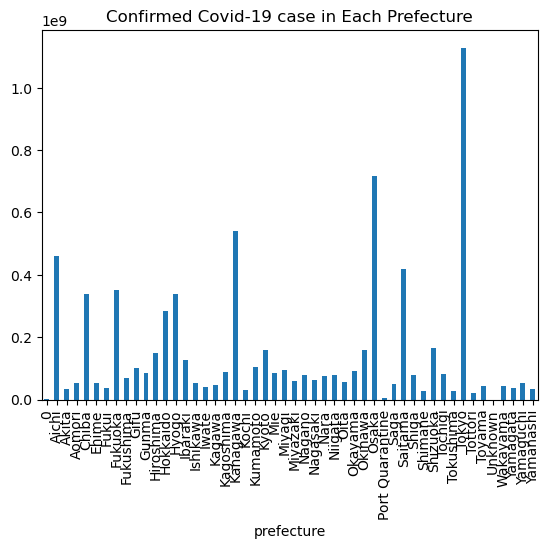

In [19]:
#visualize confirmed and case in each prefecture with bar chart
japan_df.groupby('prefecture')['confirmed'].sum().plot(kind='bar', title='Confirmed Covid-19 case in Each Prefecture')

#### Perbandingan kematian pada Tokyo

<AxesSubplot:title={'center':'Death in Japan by Year'}, xlabel='year'>

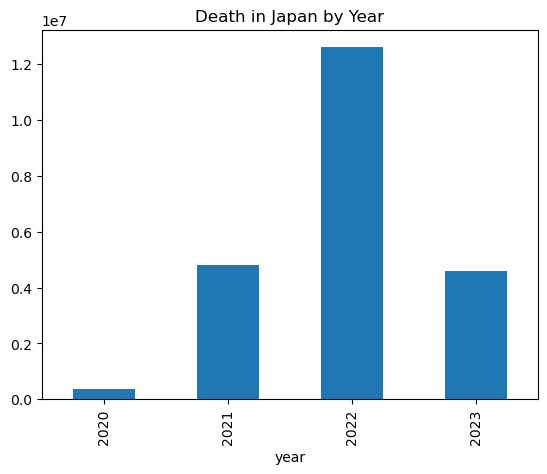

In [20]:
#visualize death in japan by year with bar chart
japan_df.groupby('year')['deaths'].sum().plot(kind='bar', title='Death in Japan by Year')


#### Perbandingan Kesembuhan pada Jepang

<AxesSubplot:title={'center':'Recovered in Japan by Year'}, xlabel='year'>

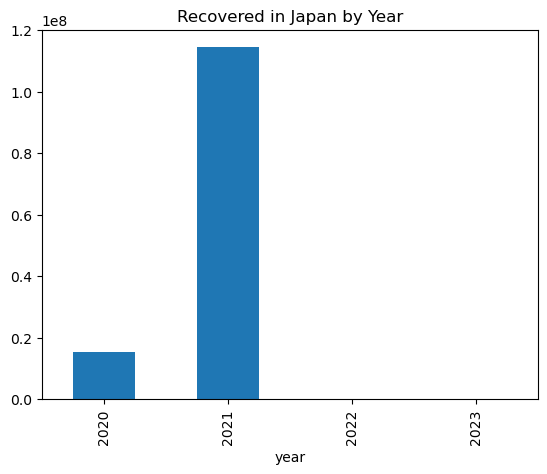

In [21]:
#visualize recovered in Japan by year with bar chart
japan_df.groupby('year')['recovered'].sum().plot(kind='bar', title='Recovered in Japan by Year')

#### Perbandingan antara kematian dan kesembuhan pada Jepang

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/2024696210.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  japan_df.groupby('year')['deaths','recovered'].sum().plot(kind='bar', title='Death and Recovered in Japan by Year')


<AxesSubplot:title={'center':'Death and Recovered in Japan by Year'}, xlabel='year'>

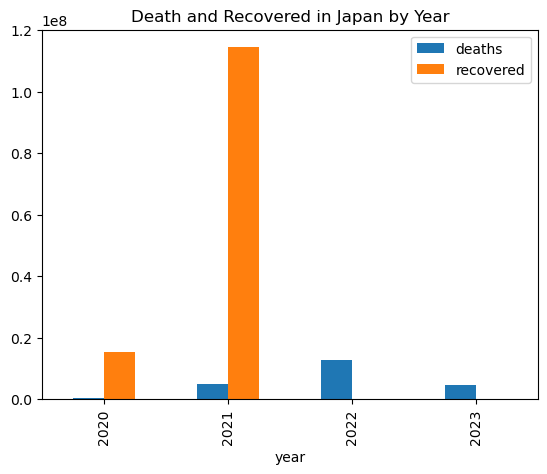

In [22]:
#Compare death and recovered in Japan by year with bar chart
japan_df.groupby('year')['deaths','recovered'].sum().plot(kind='bar', title='Death and Recovered in Japan by Year')

### Tokyo

In [23]:
tokyo_df['date'] = pd.to_datetime(tokyo_df['date'])
tokyo_df['year'] = tokyo_df['date'].dt.year

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/1137114530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_df['date'] = pd.to_datetime(tokyo_df['date'])
/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/1137114530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_df['year'] = tokyo_df['date'].dt.year


#### Perbandingan kematian pada Tokyo

<AxesSubplot:title={'center':'Death in Tokyo by Year'}, xlabel='year'>

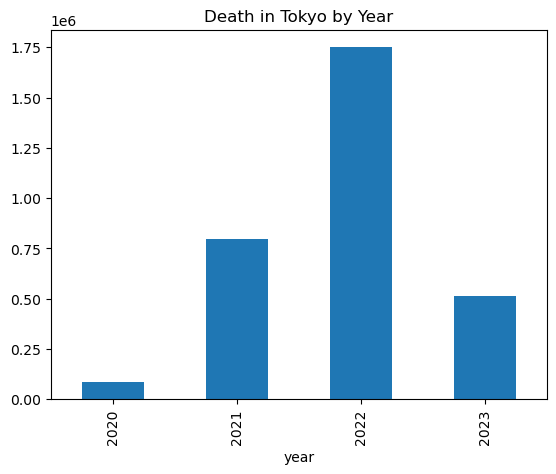

In [24]:
#visualize death in Tokyo by year with bar chart
tokyo_df.groupby('year')['deaths'].sum().plot(kind='bar', title='Death in Tokyo by Year')

#### Perbandingan kesembuhan pada Tokyo

<AxesSubplot:title={'center':'Recovered in Tokyo by Year'}, xlabel='year'>

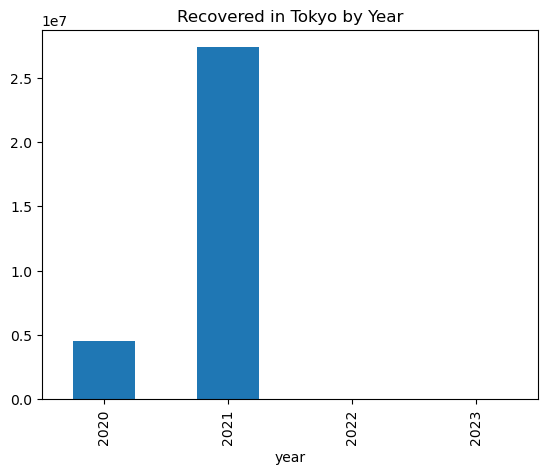

In [25]:
#visualize recovered in Tokyo by year with bar chart
tokyo_df.groupby('year')['recovered'].sum().plot(kind='bar', title='Recovered in Tokyo by Year')

#### Perbandingan antara kematian dan kesembuhan pada Tokyo

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/4009891598.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tokyo_df.groupby('year')['deaths','recovered'].sum().plot(kind='bar', title='Death and Recovered in Tokyo by Year')


<AxesSubplot:title={'center':'Death and Recovered in Tokyo by Year'}, xlabel='year'>

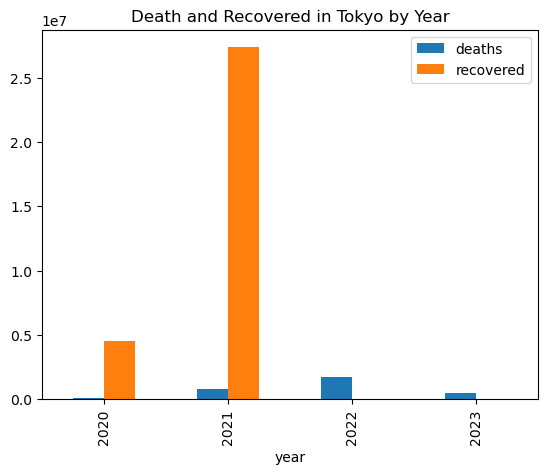

In [26]:
#Compare death and recovered in Tokyo by year with bar chart
tokyo_df.groupby('year')['deaths','recovered'].sum().plot(kind='bar', title='Death and Recovered in Tokyo by Year')

### Kyoto dan Fukuoka

#### Perbandingan kematian pada Kyoto dan Osaka

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/3454536073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kyoto_fukuoka_df['date'] = pd.to_datetime(kyoto_fukuoka_df['date'])
/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/3454536073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kyoto_fukuoka_df['year'] = kyoto_fukuoka_df['date'].dt.year


<AxesSubplot:title={'center':'Death in Kyoto and Fukuoka by Year'}, xlabel='year'>

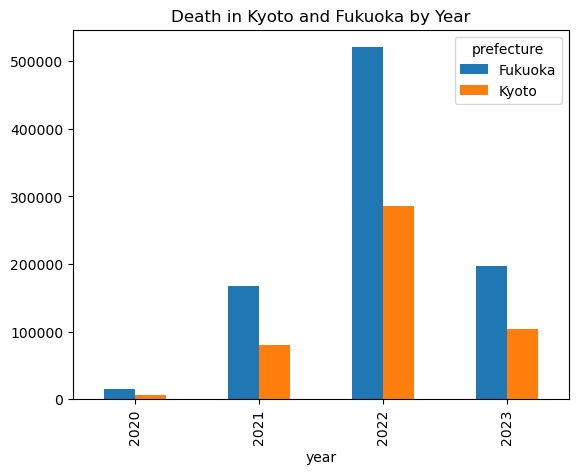

In [27]:
#compare death kyoto and fukuoka prefecture in Japan by year with bar chart
kyoto_fukuoka_df['date'] = pd.to_datetime(kyoto_fukuoka_df['date'])
kyoto_fukuoka_df['year'] = kyoto_fukuoka_df['date'].dt.year

kyoto_fukuoka_df.groupby(['year','prefecture'])['deaths'].sum().unstack().plot(kind='bar', title='Death in Kyoto and Fukuoka by Year')

#### Perbandingan kesembuhan pada Kyoto dan Osaka

<AxesSubplot:title={'center':'Recovered in Kyoto and Fukuoka by Year'}, xlabel='year'>

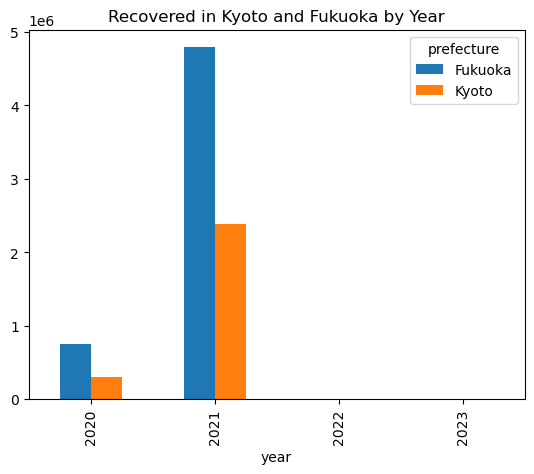

In [28]:
#visualize recovered in Kyoto and Fukuoka by year with bar chart
kyoto_fukuoka_df.groupby(['year','prefecture'])['recovered'].sum().unstack().plot(kind='bar', title='Recovered in Kyoto and Fukuoka by Year')

#### Perbandingan kasus terkonfirmasi pada Kyoto dan Osaka

<AxesSubplot:title={'center':'Confirmed case in Kyoto and Fukuoka by Year'}, xlabel='year'>

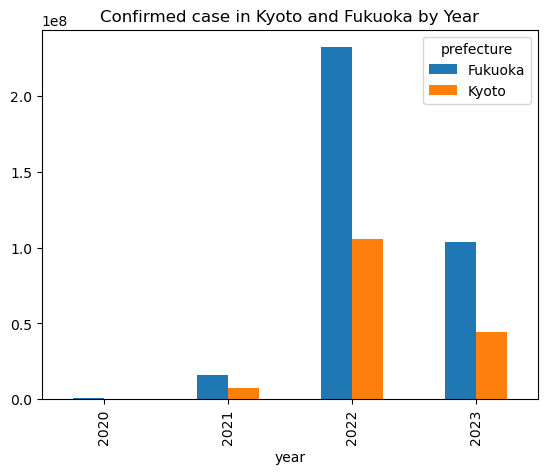

In [29]:
#visualize confirmed case in Kyoto and Fukuoka
kyoto_fukuoka_df.groupby(['year','prefecture'])['confirmed'].sum().unstack().plot(kind='bar', title='Confirmed case in Kyoto and Fukuoka by Year')

#### Perbandingan antara kematian dan kesembuhan pada Kyoto dan Osaka

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_37882/1850863566.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  kyoto_fukuoka_df.groupby(['year','prefecture'])['deaths','recovered'].sum().unstack().plot(kind='bar', title='Death and Recovered in Kyoto and Fukuoka by Year')


<AxesSubplot:title={'center':'Death and Recovered in Kyoto and Fukuoka by Year'}, xlabel='year'>

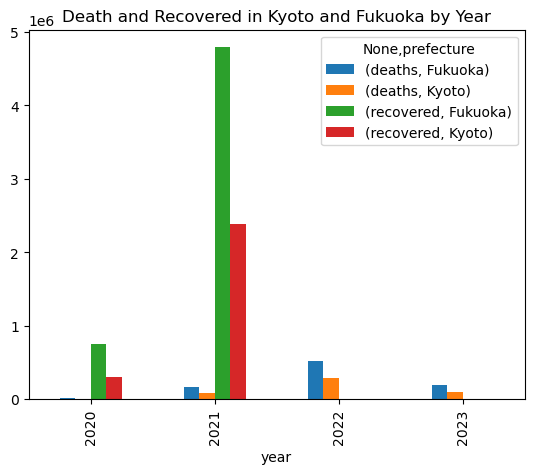

In [30]:
#Compare death and recovered where Kyoto and Fukuoka by year with bar chart
kyoto_fukuoka_df.groupby(['year','prefecture'])['deaths','recovered'].sum().unstack().plot(kind='bar', title='Death and Recovered in Kyoto and Fukuoka by Year')

## Conclusions, Assumptions, Overall Analysis

**Japan**
- Pada Negara Jepang, tingkat kasus aktif Covid-19 terbanyak terjadi pada prefektur Tokyo kemudian disusul Osaka diurutan kedua dan Kahagawa diurutan ketiga.
- Tahun 2022 merupakan merupakan kasus kematian akibat Covid-19 terbanyak pada Negara jepang.
- Angka kesembuhan tiap tahun belum bisa diprediksi dikarenakan hilangnya data pada tahun 2022 dan 2023.
- Angka kesembuhan lebih tinggi dari pada kematian setiap tahunnya jika dilihat dari dua tahun terakhir.

**Tokyo**
- Pada prefektur tokyo tingkat kasus kematian akibat Covid-19 terbanyak terjadi pada tahun 2022
- Angka kesembuhan tiap tahun belum bisa diprediksi dikarenakan hilangnya data pada tahun 2022 dan 2023.
- Angka kesembuhan lebih tinggi dari pada kematian setiap tahunnya jika dilihat dari dua tahun terakhir.

**Kyoto dan Fukuoka**
- Kasus kematian akibat Covid-19 terjadi lebih banyak pada prefektur Fukuoka dibandingkan Kyoto dan pada kedua prefektur tersebut pada tahun 2022 juga menjadi tahun dengan kematian terbanyak.
- Angka kesembuhan tiap tahun belum bisa diprediksi dikarenakan hilangnya data pada tahun 2022 dan 2023.
- Angka kesembuhan lebih tinggi dari kematian pada dua tahun terakhir di prefektur Fukuoka lebih tinggi dari pada Osaka. Hal ini dipengaruhi juga oleh jumlah kasus Covid-19 terkonfirmasi yang lebih banyak pada prefektur Fukuoka dari pada Osaka.

**Kesimpulan Singkat**
- Setiap prefektur di Jepang memiliki angka kasus Covid-19 tertinggi pada tahun 2022 dan dilihat dari trendnya, angka kesembuhan mungkin lebih tinggi dari pada kematian pada negara Jepang.